In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv("symp.csv")

# 1. Handling Missing Values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numeric missing values with median
df.fillna(df.mode().iloc[0], inplace=True)  # Fill categorical missing values with mode



In [84]:
df

,Patient ID,Age,Gender,Fever,Cough,Fatigue,Headache,Shortness of Breath,Nausea,Sore Throat,...,Diarrhea,Chest Pain,Chills,Sweating,Dizziness,Skin Rash,Joint Pain,Blurred Vision,Weight Loss,Diagnosis
0,1001,45,Other,0,0,0,0,0,1,1,...,1,0,0,0,1,0,1,1,0,Tuberculosis
1,1002,67,Other,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,Migraine
2,1003,72,Male,0,0,1,0,0,1,0,...,1,1,1,1,0,0,1,1,0,Food Poisoning
3,1004,21,Other,1,0,0,0,1,1,1,...,0,1,1,1,1,1,1,1,0,Sinusitis
4,1005,36,Male,0,0,1,1,1,0,0,...,1,1,1,0,1,1,0,0,1,Malaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1496,21,Other,0,1,1,0,0,1,0,...,1,1,0,0,1,1,1,1,0,Dengue
496,1497,31,Other,0,0,0,0,0,0,1,...,1,0,1,1,0,0,1,0,0,Food Poisoning
497,1498,31,Female,1,1,1,1,0,1,1,...,0,1,0,1,1,0,1,1,0,Asthma
498,1499,70,Female,1,0,0,1,0,0,1,...,1,0,1,0,1,0,0,1,0,Dengue


In [61]:
# 2. Encoding Categorical Variables
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for inverse transformation if needed


In [62]:
label_encoders

{'Gender': LabelEncoder(), 'Diagnosis': LabelEncoder()}

In [63]:
# Recalculate numerical columns after encoding categorical variables
numerical_cols = df.select_dtypes(include=['number']).columns

# Debugging step: Print available columns
print("Available Columns:", df.columns)

# Ensure numerical columns exist before outlier removal
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Save the cleaned dataset
df.to_csv("updated_symp.csv", index=False)

# Display confirmation
print("Updated dataset saved as 'updated_symp.csv'. Shape:", df.shape)



Available Columns: Index(['Patient ID', 'Age', 'Gender', 'Fever', 'Cough', 'Fatigue', 'Headache',
       'Shortness of Breath', 'Nausea', 'Sore Throat', 'Runny Nose',
       'Body Aches', 'Loss of Smell', 'Vomiting', 'Diarrhea', 'Chest Pain',
       'Chills', 'Sweating', 'Dizziness', 'Skin Rash', 'Joint Pain',
       'Blurred Vision', 'Weight Loss', 'Diagnosis'],
      dtype='object')
Updated dataset saved as 'updated_symp.csv'. Shape: (500, 24)


In [64]:
df

,Patient ID,Age,Gender,Fever,Cough,Fatigue,Headache,Shortness of Breath,Nausea,Sore Throat,...,Diarrhea,Chest Pain,Chills,Sweating,Dizziness,Skin Rash,Joint Pain,Blurred Vision,Weight Loss,Diagnosis
0,1001,45,2,0,0,0,0,0,1,1,...,1,0,0,0,1,0,1,1,0,14
1,1002,67,2,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,11
2,1003,72,1,0,0,1,0,0,1,0,...,1,1,1,1,0,0,1,1,0,7
3,1004,21,2,1,0,0,0,1,1,1,...,0,1,1,1,1,1,1,1,0,13
4,1005,36,1,0,0,1,1,1,0,0,...,1,1,1,0,1,1,0,0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1496,21,2,0,1,1,0,0,1,0,...,1,1,0,0,1,1,1,1,0,5
496,1497,31,2,0,0,0,0,0,0,1,...,1,0,1,1,0,0,1,0,0,7
497,1498,31,0,1,1,1,1,0,1,1,...,0,1,0,1,1,0,1,1,0,1
498,1499,70,0,1,0,0,1,0,0,1,...,1,0,1,0,1,0,0,1,0,5


In [55]:
# Load the dataset
df = pd.read_csv("updated_symp.csv")

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a dictionary to store encoders and their mappings
label_encoders = {}
encoding_map = {}

# Encode categorical features
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Transform the column
    label_encoders[col] = le  # Store the encoder for later use
    
    # Store mapping for original -> encoded values
    encoding_map[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Convert encoding map to a DataFrame for better visualization
encoding_df = pd.DataFrame(
    [(col, orig, enc) for col, mapping in encoding_map.items() for orig, enc in mapping.items()],
    columns=["Category", "Original Value", "Encoded Value"]
)

# Display the table
print(encoding_df)

# If you want to save it as a CSV file
encoding_df.to_csv("encoded_categories.csv", index=False)


     Category   Original Value  Encoded Value
0   Diagnosis          Allergy              0
1   Diagnosis           Asthma              1
2   Diagnosis       Bronchitis              2
3   Diagnosis         COVID-19              3
4   Diagnosis      Common Cold              4
5   Diagnosis           Dengue              5
6   Diagnosis              Flu              6
7   Diagnosis   Food Poisoning              7
8   Diagnosis  Gastroenteritis              8
9   Diagnosis    Heart Disease              9
10  Diagnosis          Malaria             10
11  Diagnosis         Migraine             11
12  Diagnosis        Pneumonia             12
13  Diagnosis        Sinusitis             13
14  Diagnosis     Tuberculosis             14


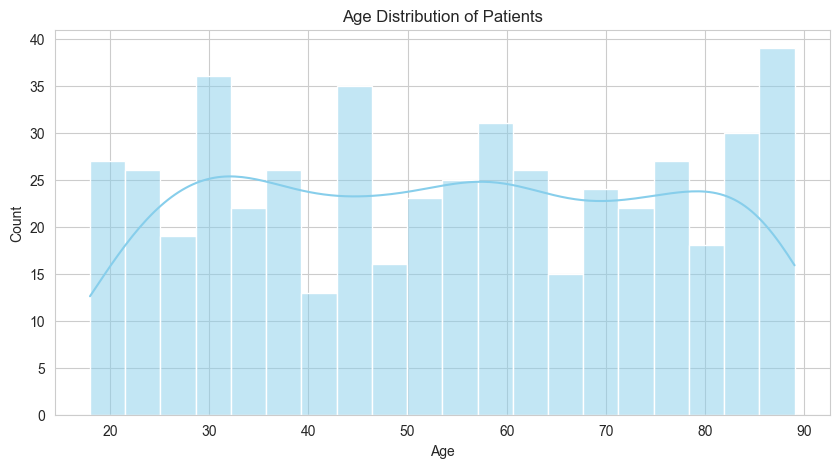

C:\Users\dell\AppData\Local\Temp\ipykernel_9352\3132840865.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="pastel")


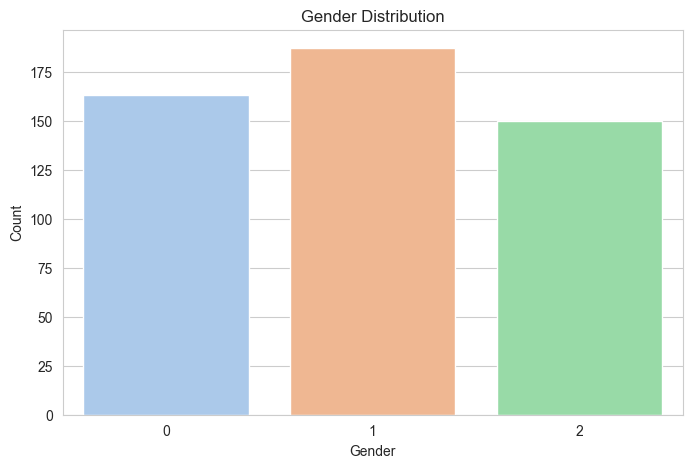

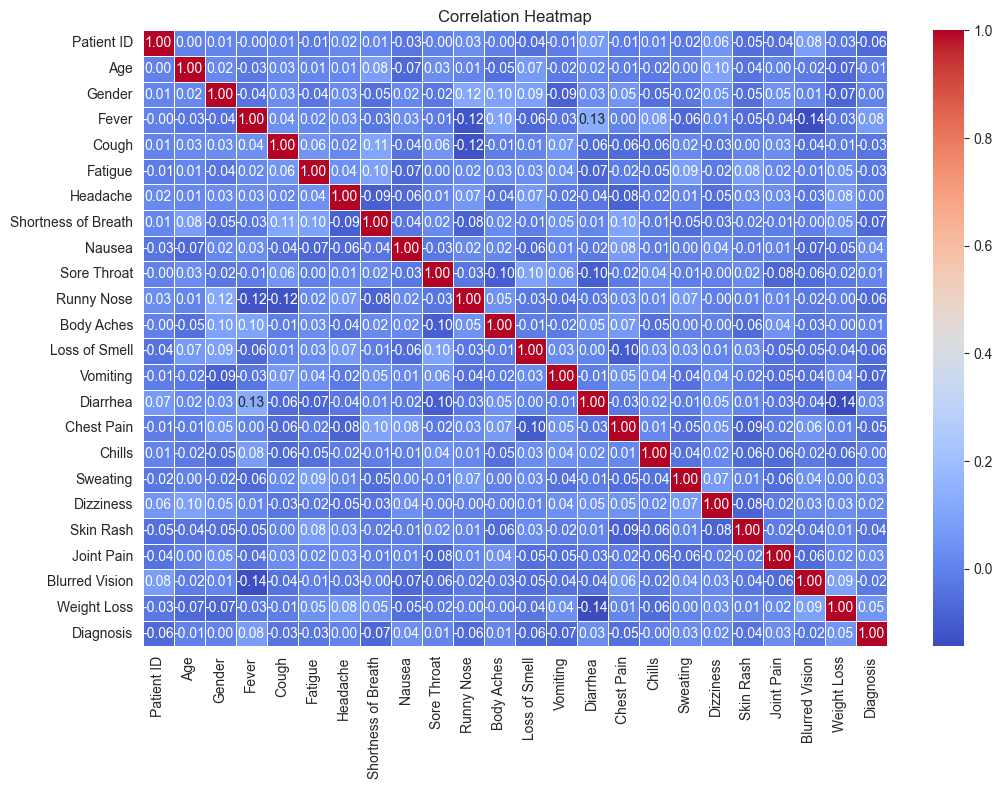

C:\Users\dell\AppData\Local\Temp\ipykernel_9352\3132840865.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Diagnosis"], order=df["Diagnosis"].value_counts().index, palette="viridis")


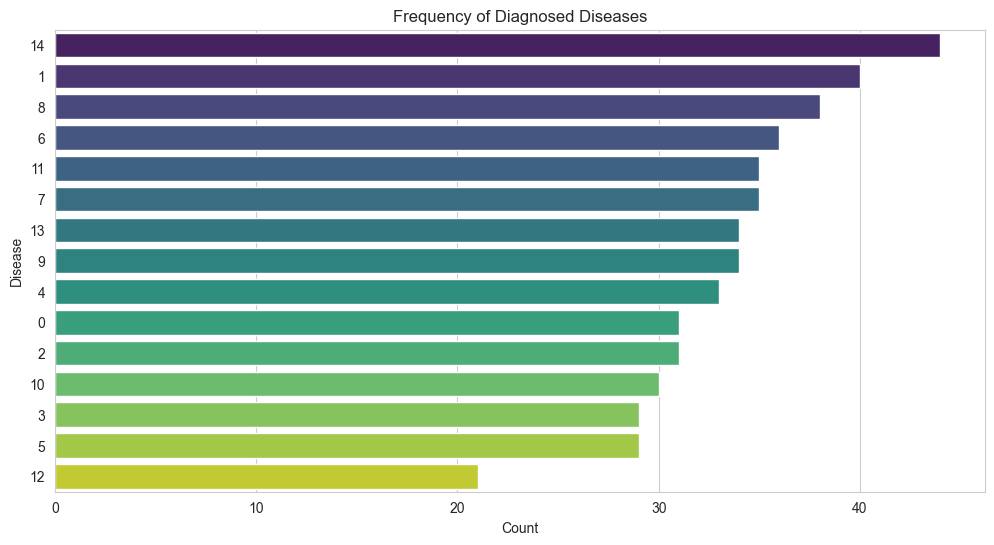

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "updated_symp.csv"
df = pd.read_csv(file_path)

# Set style
sns.set_style("whitegrid")

# 1. Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 2. Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Gender", data=df, palette="pastel")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# 3. Correlation Heatmap (Numerical Features)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 4. Diagnosis Count (Top Diagnosed Diseases)
plt.figure(figsize=(12, 6))
sns.countplot(y=df["Diagnosis"], order=df["Diagnosis"].value_counts().index, palette="viridis")
plt.title("Frequency of Diagnosed Diseases")
plt.xlabel("Count")
plt.ylabel("Disease")
plt.show()


In [67]:
df

,Patient ID,Age,Gender,Fever,Cough,Fatigue,Headache,Shortness of Breath,Nausea,Sore Throat,...,Diarrhea,Chest Pain,Chills,Sweating,Dizziness,Skin Rash,Joint Pain,Blurred Vision,Weight Loss,Diagnosis
0,1001,45,2,0,0,0,0,0,1,1,...,1,0,0,0,1,0,1,1,0,14
1,1002,67,2,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,11
2,1003,72,1,0,0,1,0,0,1,0,...,1,1,1,1,0,0,1,1,0,7
3,1004,21,2,1,0,0,0,1,1,1,...,0,1,1,1,1,1,1,1,0,13
4,1005,36,1,0,0,1,1,1,0,0,...,1,1,1,0,1,1,0,0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1496,21,2,0,1,1,0,0,1,0,...,1,1,0,0,1,1,1,1,0,5
496,1497,31,2,0,0,0,0,0,0,1,...,1,0,1,1,0,0,1,0,0,7
497,1498,31,0,1,1,1,1,0,1,1,...,0,1,0,1,1,0,1,1,0,1
498,1499,70,0,1,0,0,1,0,0,1,...,1,0,1,0,1,0,0,1,0,5


In [76]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
file_path = "updated_symp.csv"
df = pd.read_csv(file_path)

# Encode categorical variables (Gender & Diagnosis)
label_encoders = {}
categorical_cols = ['Gender', 'Diagnosis']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for inverse transformation if needed

# Define numerical columns after encoding
numerical_cols = df.select_dtypes(include=['number']).columns

# Define Target Variables
target_reg = "Age"  # Example target for regression (modify as needed)
target_clf = "Diagnosis"  # Classification target

#  Split Data for Regression
if target_reg in df.columns:
    X_reg = df[numerical_cols].drop(columns=[target_reg])  
    y_reg = df[target_reg]
    
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

    # Standardize Data
    scaler_reg = StandardScaler()
    X_train_reg = scaler_reg.fit_transform(X_train_reg)
    X_test_reg = scaler_reg.transform(X_test_reg)

#Split Data for Classification
if target_clf in df.columns:
    X_clf = df.drop(columns=[target_clf, "Patient ID"])  # Exclude Patient ID (not a feature)
    y_clf = df[target_clf]
    
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

    # Standardize Data
    scaler_clf = StandardScaler()
    X_train_clf = scaler_clf.fit_transform(X_train_clf)
    X_test_clf = scaler_clf.transform(X_test_clf)

# ---------------------------------------------------
# 🔥 Baseline Linear Regression Model (for Age)
# ---------------------------------------------------
if target_reg in df.columns:
    reg_model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train_reg.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Output Layer for Regression
    ])

    reg_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Train Regression Model
    reg_model.fit(X_train_reg, y_train_reg, epochs=50, batch_size=16, validation_data=(X_test_reg, y_test_reg))

    # Evaluate Regression Model
    reg_results = reg_model.evaluate(X_test_reg, y_test_reg)
    print(f"Regression Model - Test Loss: {reg_results[0]:.4f}, Test MAE: {reg_results[1]:.4f}")



Epoch 1/50


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 3383.2280 - mae: 54.1272 - val_loss: 2847.5090 - val_mae: 49.1551
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2729.0498 - mae: 47.5800 - val_loss: 1464.6467 - val_mae: 32.2453
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1249.2780 - mae: 29.2928 - val_loss: 489.4148 - val_mae: 18.6030
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 442.2838 - mae: 17.9847 - val_loss: 487.3447 - val_mae: 18.6861
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 430.4785 - mae: 17.9158 - val_loss: 504.4773 - val_mae: 19.0512
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 406.8748 - mae: 17.2583 - val_loss: 513.2421 - val_mae: 19.0746
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 402.9803 - mae: 17.2577 - val_loss: 517.8747 - val_mae: 19.1008
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 356.4899 - mae: 16.0227 - val_loss: 523.8748 - val_mae: 19.2595
Epoch 9/50
25/25 ━━━━━━━━━━━━

In [77]:
# ---------------------------------------------------
# 🔥 Baseline Classification Model (for Diagnosis)
# ---------------------------------------------------
if target_clf in df.columns:
    num_classes = len(np.unique(y_clf))  # Determine number of classes
    activation_fn = 'sigmoid' if num_classes == 2 else 'softmax'
    loss_fn = 'binary_crossentropy' if num_classes == 2 else 'sparse_categorical_crossentropy'

    clf_model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train_clf.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes, activation=activation_fn)  # Adjusted output for multi-class classification
    ])

    clf_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

    # Train Classification Model
    clf_model.fit(X_train_clf, y_train_clf, epochs=50, batch_size=16, validation_data=(X_test_clf, y_test_clf))

    # Evaluate Classification Model
    clf_results = clf_model.evaluate(X_test_clf, y_test_clf)
    print(f"Classification Model - Test Loss: {clf_results[0]:.4f}, Test Accuracy: {clf_results[1]:.4f}")


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.0704 - loss: 2.7349 - val_accuracy: 0.0900 - val_loss: 2.7151
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1522 - loss: 2.6361 - val_accuracy: 0.0800 - val_loss: 2.7139
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1874 - loss: 2.5641 - val_accuracy: 0.0600 - val_loss: 2.7279
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2508 - loss: 2.4876 - val_accuracy: 0.0700 - val_loss: 2.7497
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2533 - loss: 2.4287 - val_accuracy: 0.0500 - val_loss: 2.7709
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2852 - loss: 2.3328 - val_accuracy: 0.0700 - val_loss: 2.8142
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3486 - loss: 2.2499 - val_accuracy: 0.0600 - val_loss: 2.8548
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4554 - loss: 2.0889 - val_accuracy: 0.0600 - val_loss

In [78]:
import pandas as pd

# Load dataset
df = pd.read_csv("updated_symp.csv")

# Define test suggestions based on symptoms
test_mapping = {
    "Fever": "Blood Test",
    "Cough": "Chest X-ray",
    "Fatigue": "Thyroid Test",
    "Headache": "MRI Scan",
    "Shortness of Breath": "Pulmonary Function Test",
    "Nausea": "Stomach Ultrasound",
    "Sore Throat": "Throat Swab Test",
    "Diarrhea": "Stool Test",
    "Chest Pain": "ECG",
    "Dizziness": "Blood Pressure Test",
    "Skin Rash": "Allergy Test",
    "Joint Pain": "Rheumatoid Factor Test",
    "Blurred Vision": "Eye Test",
    "Weight Loss": "Diabetes Test"
}

# Function to suggest tests
def suggest_tests(row):
    tests = [test for symptom, test in test_mapping.items() if row[symptom] == 1]
    return ", ".join(tests) if tests else "No test needed"

# Apply the function
df["Suggested Tests"] = df.apply(suggest_tests, axis=1)

# Save to new CSV
df.to_csv("test.csv", index=False)

print("Test suggestions saved to test.csv")


Test suggestions saved to test.csv


In [79]:
df

,Patient ID,Age,Gender,Fever,Cough,Fatigue,Headache,Shortness of Breath,Nausea,Sore Throat,...,Chest Pain,Chills,Sweating,Dizziness,Skin Rash,Joint Pain,Blurred Vision,Weight Loss,Diagnosis,Suggested Tests
0,1001,45,2,0,0,0,0,0,1,1,...,0,0,0,1,0,1,1,0,14,"Stomach Ultrasound, Throat Swab Test, Stool Te..."
1,1002,67,2,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,11,"Blood Test, Blood Pressure Test, Rheumatoid Fa..."
2,1003,72,1,0,0,1,0,0,1,0,...,1,1,1,0,0,1,1,0,7,"Thyroid Test, Stomach Ultrasound, Stool Test, ..."
3,1004,21,2,1,0,0,0,1,1,1,...,1,1,1,1,1,1,1,0,13,"Blood Test, Pulmonary Function Test, Stomach U..."
4,1005,36,1,0,0,1,1,1,0,0,...,1,1,0,1,1,0,0,1,10,"Thyroid Test, MRI Scan, Pulmonary Function Tes..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1496,21,2,0,1,1,0,0,1,0,...,1,0,0,1,1,1,1,0,5,"Chest X-ray, Thyroid Test, Stomach Ultrasound,..."
496,1497,31,2,0,0,0,0,0,0,1,...,0,1,1,0,0,1,0,0,7,"Throat Swab Test, Stool Test, Rheumatoid Facto..."
497,1498,31,0,1,1,1,1,0,1,1,...,1,0,1,1,0,1,1,0,1,"Blood Test, Chest X-ray, Thyroid Test, MRI Sca..."
498,1499,70,0,1,0,0,1,0,0,1,...,0,1,0,1,0,0,1,0,5,"Blood Test, MRI Scan, Throat Swab Test, Stool ..."


In [87]:
import pandas as pd

# Load both CSV files
symp_df = pd.read_csv("updated_symp.csv")
test_df = pd.read_csv("test.csv")

# Merge the two datasets on "Patient ID" (assuming it's the common key)
merged_df = pd.merge(symp_df, test_df, on="Patient ID", how="inner")

# Save the merged dataset
merged_df.to_csv("merged_symp_test.csv", index=False)

# Display the first few rows of the merged dataset
print(merged_df.head())


   Patient ID  Age_x  Gender_x  Fever_x  Cough_x  Fatigue_x  Headache_x  \
0        1001     45         2        0        0          0           0   
1        1002     67         2        1        0          0           0   
2        1003     72         1        0        0          1           0   
3        1004     21         2        1        0          0           0   
4        1005     36         1        0        0          1           1   

   Shortness of Breath_x  Nausea_x  Sore Throat_x  ...  Chest Pain_y  \
0                      0         1              1  ...             0   
1                      0         0              0  ...             0   
2                      0         1              0  ...             1   
3                      1         1              1  ...             1   
4                      1         0              0  ...             1   

   Chills_y  Sweating_y  Dizziness_y  Skin Rash_y  Joint Pain_y  \
0         0           0            1            0

In [88]:
merged_df

,Patient ID,Age_x,Gender_x,Fever_x,Cough_x,Fatigue_x,Headache_x,Shortness of Breath_x,Nausea_x,Sore Throat_x,...,Chest Pain_y,Chills_y,Sweating_y,Dizziness_y,Skin Rash_y,Joint Pain_y,Blurred Vision_y,Weight Loss_y,Diagnosis_y,Suggested Tests
0,1001,45,2,0,0,0,0,0,1,1,...,0,0,0,1,0,1,1,0,14,"Stomach Ultrasound, Throat Swab Test, Stool Te..."
1,1002,67,2,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,11,"Blood Test, Blood Pressure Test, Rheumatoid Fa..."
2,1003,72,1,0,0,1,0,0,1,0,...,1,1,1,0,0,1,1,0,7,"Thyroid Test, Stomach Ultrasound, Stool Test, ..."
3,1004,21,2,1,0,0,0,1,1,1,...,1,1,1,1,1,1,1,0,13,"Blood Test, Pulmonary Function Test, Stomach U..."
4,1005,36,1,0,0,1,1,1,0,0,...,1,1,0,1,1,0,0,1,10,"Thyroid Test, MRI Scan, Pulmonary Function Tes..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1496,21,2,0,1,1,0,0,1,0,...,1,0,0,1,1,1,1,0,5,"Chest X-ray, Thyroid Test, Stomach Ultrasound,..."
496,1497,31,2,0,0,0,0,0,0,1,...,0,1,1,0,0,1,0,0,7,"Throat Swab Test, Stool Test, Rheumatoid Facto..."
497,1498,31,0,1,1,1,1,0,1,1,...,1,0,1,1,0,1,1,0,1,"Blood Test, Chest X-ray, Thyroid Test, MRI Sca..."
498,1499,70,0,1,0,0,1,0,0,1,...,0,1,0,1,0,0,1,0,5,"Blood Test, MRI Scan, Throat Swab Test, Stool ..."


In [13]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Load dataset
df = pd.read_csv("merged_symp_test.csv")

#  Check if "Suggested Tests" column exists
if "Suggested Tests" in df.columns:
    df["Suggested Tests"] = df["Suggested Tests"].fillna("")  # Handle missing values
    df["Suggested Tests"] = df["Suggested Tests"].apply(lambda x: x.split(", "))  # Convert string to list

    #  MultiLabelBinarizer to convert "Suggested Tests" to numerical values
    mlb = MultiLabelBinarizer()
    test_labels = mlb.fit_transform(df["Suggested Tests"])
    test_labels_df = pd.DataFrame(test_labels, columns=mlb.classes_)

    #  Drop original column & add numerical test features
    df = df.drop(columns=["Suggested Tests"])
    df = pd.concat([df, test_labels_df], axis=1)

#  Save the modified dataset
df.to_csv("updated_symp_test.csv", index=False)
print(" Updated dataset saved as 'updated_symp_test.csv'")


✅ Updated dataset saved as 'updated_symp_test.csv'


In [30]:
df

,Patient ID,Age_x,Gender_x,Fever_x,Cough_x,Fatigue_x,Headache_x,Shortness of Breath_x,Nausea_x,Sore Throat_x,...,Diabetes Test,ECG,Eye Test,MRI Scan,Pulmonary Function Test,Rheumatoid Factor Test,Stomach Ultrasound,Stool Test,Throat Swab Test,Thyroid Test
0,1001,45,2,0,0,0,0,0,1,1,...,0,0,1,0,0,1,1,1,1,0
1,1002,67,2,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,1003,72,1,0,0,1,0,0,1,0,...,0,1,1,0,0,1,1,1,0,1
3,1004,21,2,1,0,0,0,1,1,1,...,0,1,1,0,1,1,1,0,1,0
4,1005,36,1,0,0,1,1,1,0,0,...,1,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1496,21,2,0,1,1,0,0,1,0,...,0,1,1,0,0,1,1,1,0,1
496,1497,31,2,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
497,1498,31,0,1,1,1,1,0,1,1,...,0,1,1,1,0,1,1,0,1,1
498,1499,70,0,1,0,0,1,0,0,1,...,0,0,1,1,0,0,0,1,1,0


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv("updated_symp_test.csv")

# Ensure "Patient ID" exists
if "Patient ID" in df.columns:
    patient_ids = df["Patient ID"]  # Store separately
    df = df.drop(columns=["Patient ID"])  # Remove before training

#  Split features (X) and suggested tests (Y)
X = df.drop(columns=df.columns[-10:])  # Assuming last 10 columns are tests
Y = df[df.columns[-10:]]

#  Train/Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#  Train Model
clf = MultiOutputClassifier(RandomForestClassifier(random_state=42))
clf.fit(X_train, Y_train)

#  Predict Tests for All Patients (not just test set)
predicted_tests = clf.predict(X)
predicted_tests_df = pd.DataFrame(predicted_tests, columns=Y.columns)

# Add back ALL Patient IDs
predicted_tests_df.insert(0, "Patient ID", patient_ids.values)

# Save Predictions
predicted_tests_df.to_csv("suggested_tests.csv", index=False)

print(" Suggested tests saved as 'suggested_tests.csv'")
print(predicted_tests_df.head())  # Display sample results


✅ Suggested tests saved as 'suggested_tests.csv'
   Patient ID  Diabetes Test  ECG  Eye Test  MRI Scan  \
0        1001              0    0         1         0   
1        1002              1    0         0         0   
2        1003              0    1         1         0   
3        1004              0    1         1         0   
4        1005              1    1         0         1   

   Pulmonary Function Test  Rheumatoid Factor Test  Stomach Ultrasound  \
0                        0                       1                   1   
1                        0                       1                   0   
2                        0                       1                   1   
3                        1                       1                   1   
4                        1                       0                   0   

   Stool Test  Throat Swab Test  Thyroid Test  
0           1                 1             0  
1           0                 0             0  
2           1      

In [37]:
predicted_tests_df

,Patient ID,Diabetes Test,ECG,Eye Test,MRI Scan,Pulmonary Function Test,Rheumatoid Factor Test,Stomach Ultrasound,Stool Test,Throat Swab Test,Thyroid Test
0,1001,0,0,1,0,0,1,1,1,1,0
1,1002,1,0,0,0,0,1,0,0,0,0
2,1003,0,1,1,0,0,1,1,1,0,1
3,1004,0,1,1,0,1,1,1,0,1,0
4,1005,1,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
495,1496,0,1,1,0,0,1,1,1,0,1
496,1497,0,0,0,0,0,1,0,1,1,0
497,1498,0,1,1,1,0,1,1,0,1,1
498,1499,0,0,1,1,0,0,0,1,1,0


In [38]:
import pandas as pd

#  Load the suggested tests dataset
df_tests = pd.read_csv("suggested_tests.csv")

#  Function to get suggested tests for a specific Patient ID
def get_tests_for_patient(patient_id):
    if patient_id in df_tests["Patient ID"].values:
        patient_data = df_tests[df_tests["Patient ID"] == patient_id]
        
        #  Extract only the test columns (excluding Patient ID)
        test_results = patient_data.iloc[:, 1:].squeeze()  # Remove ID and flatten row
        
        #  List tests where the value is 1 (recommended tests)
        recommended_tests = test_results.index[test_results == 1].tolist()

        print(f" Suggested tests for Patient ID {patient_id}:")
        for test in recommended_tests:
            print(f"  - {test}")

    else:
        print(f"❌ Patient ID {patient_id} not found in the dataset.")

# Take Patient ID as input
patient_id = int(input("Enter Patient ID: "))
get_tests_for_patient(patient_id)


Enter Patient ID: 1001
✅ Suggested tests for Patient ID 1001:
  - Eye Test
  - Rheumatoid Factor Test
  - Stomach Ultrasound
  - Stool Test
  - Throat Swab Test


In [40]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("suggested_tests.csv")

# Store Patient IDs separately
patient_ids = df["Patient ID"]

# Drop Patient ID (not a predictive feature for training)
df.drop(columns=["Patient ID"], inplace=True)

# Splitting features and targets
X = df.copy()  # Features

# Targets are all test columns (multi-label classification)
y = (df > 0).astype(int)  # Convert to binary classification (0 or 1)

# Train-test split
X_train, X_test, y_train, y_test, patient_train, patient_test = train_test_split(
    X, y, patient_ids, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Multi-Label Classification Model ###
def build_multilabel_classification_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(y.shape[1], activation="sigmoid")  # Multi-label output
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Build and train the model
model = build_multilabel_classification_model()
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Performance - Loss: {loss}, Accuracy: {accuracy}")

# Function to predict tests for a specific Patient ID
def get_tests_for_patient(patient_id):
    if patient_id in patient_test.values:
        idx = np.where(patient_test.values == patient_id)[0][0]
        patient_data = X_test[idx].reshape(1, -1)
        predicted_tests = model.predict(patient_data)[0]  # Get predictions
        
        # Convert predictions to binary (threshold 0.5)
        recommended_tests = (predicted_tests > 0.5).astype(int)
        test_names = df.columns[recommended_tests == 1].tolist()
        
        print(f"Suggested tests for Patient ID {patient_id}:")
        for test in test_names:
            print(f"  - {test}")
    else:
        print(f"❌ Patient ID {patient_id} not found in the dataset.")

# Take Patient ID as input and predict
patient_id = int(input("Enter Patient ID: "))
get_tests_for_patient(patient_id)


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.0783 - loss: 0.6986 - val_accuracy: 0.1400 - val_loss: 0.6641
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1569 - loss: 0.6501 - val_accuracy: 0.1900 - val_loss: 0.6230
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2199 - loss: 0.6051 - val_accuracy: 0.2000 - val_loss: 0.5825
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2125 - loss: 0.5628 - val_accuracy: 0.2200 - val_loss: 0.5399
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2088 - loss: 0.5151 - val_accuracy: 0.2100 - val_loss: 0.4930
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1904 - loss: 0.4645 - val_accuracy: 0.2100 - val_loss: 0.4434
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1943 - loss: 0.4084 - val_accuracy: 0.1900 - val_loss: 0.3921
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1886 - loss: 0.3557 - val_accuracy: 0.2200 - val_l

In [43]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score

# Load dataset
df = pd.read_csv("suggested_tests.csv")

# Store Patient IDs separately
patient_ids = df["Patient ID"]

# Drop Patient ID (not a predictive feature for training)
df.drop(columns=["Patient ID"], inplace=True)

# Splitting features and targets
X = df.copy()  # Features

# Targets are all test columns (multi-label classification)
y = (df > 0).astype(int)  # Convert to binary classification (0 or 1)

# Train-test split
X_train, X_test, y_train, y_test, patient_train, patient_test = train_test_split(
    X, y, patient_ids, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Optimized Multi-Label Classification Model ###
def build_multilabel_classification_model():
    model = keras.Sequential([
        keras.layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(y.shape[1], activation="sigmoid")  # Multi-label output
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Build and train the model with fewer epochs for faster execution
model = build_multilabel_classification_model()
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Performance - Loss: {loss}, Accuracy: {accuracy}")

# Fairness Evaluation using Balanced Accuracy
def evaluate_fairness():
    predictions = (model.predict(X_test) > 0.5).astype(int)  # Convert predictions to binary
    fairness_scores = []
    
    for i, test in enumerate(df.columns):
        fairness_score = balanced_accuracy_score(y_test.iloc[:, i], predictions[:, i])
        fairness_scores.append((test, fairness_score))
    
    fairness_scores.sort(key=lambda x: x[1])  # Sort by fairness score
    print("\nFairness Evaluation (Balanced Accuracy Score):")
    for test, score in fairness_scores:
        print(f"  {test}: {score:.2f}")

evaluate_fairness()

# Function to predict tests for a specific Patient ID
def get_tests_for_patient(patient_id):
    if patient_id in patient_test.values:
        idx = np.where(patient_test.values == patient_id)[0][0]
        patient_data = X_test[idx].reshape(1, -1)
        predicted_tests = model.predict(patient_data)[0]  # Get predictions
        
        # Convert predictions to binary (threshold 0.5)
        recommended_tests = (predicted_tests > 0.5).astype(int)
        test_names = df.columns[recommended_tests == 1].tolist()
        
        print(f"Suggested tests for Patient ID {patient_id}:")
        for test in test_names:
            print(f"  - {test}")
    else:
        print(f"❌ Patient ID {patient_id} not found in the dataset.")

# Take Patient ID as input and predict
patient_id = int(input("Enter Patient ID: "))
get_tests_for_patient(patient_id)


Epoch 1/10


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0690 - loss: 0.7181 - val_accuracy: 0.1100 - val_loss: 0.6659
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1106 - loss: 0.6679 - val_accuracy: 0.1200 - val_loss: 0.6271
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1449 - loss: 0.6277 - val_accuracy: 0.1600 - val_loss: 0.5903
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1980 - loss: 0.5858 - val_accuracy: 0.1700 - val_loss: 0.5519
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1558 - loss: 0.5492 - val_accuracy: 0.2000 - val_loss: 0.5106
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1849 - loss: 0.5134 - val_accuracy: 0.1800 - val_loss: 0.4676
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1980 - loss: 0.4684 - val_accuracy: 0.2200 - val_loss: 0.4222
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2131 - loss: 0.4192 - val_accuracy: 0.2400 - val_loss: 0.3770
Ep

In [45]:
!pip install shap


   ---------------------------------------- 0.0/530.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/530.3 kB ? eta -:--:--
   ---------------------------------------- 530.3/530.3 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 985.5 kB/s eta 0:00:03
   ----------- ---------------------------- 0.8/2.8 MB 1.2 MB/s eta 0:00:02
   -------------- ------------------------- 1.0/2.8 MB 1.3 MB/s eta 0:00:02
   ------------------ --------------------- 1.3/2.8 MB 1.2 MB/s eta 0:00:02
   ---------------------- ----------------- 1.6/2.8 MB 1.2 MB/s eta 0:00:02
   ------------------------- -------------- 1.8/2.8 MB 1.2 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.8 MB 1.2 MB/s eta 0:00:01
   --------------------------------- ------ 2.4/2.8 MB 1.2 MB/s eta 0:00:01
   -------------------------

Epoch 1/10


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1537 - loss: 0.7148 - val_accuracy: 0.1300 - val_loss: 0.6916
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1192 - loss: 0.6809 - val_accuracy: 0.1000 - val_loss: 0.6620
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1725 - loss: 0.6481 - val_accuracy: 0.1200 - val_loss: 0.6346
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1836 - loss: 0.6239 - val_accuracy: 0.1200 - val_loss: 0.6045
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1729 - loss: 0.5868 - val_accuracy: 0.1400 - val_loss: 0.5683
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2109 - loss: 0.5475 - val_accuracy: 0.1700 - val_loss: 0.5283
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1888 - loss: 0.5028 - val_accuracy: 0.1500 - val_loss: 0.4834
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1952 - loss: 0.4526 - val_accuracy: 0.1300 - val_loss: 0.4354
Ep

ExactExplainer explainer: 101it [00:13,  7.27it/s]                                                                                                                           



Feature Importance for Predictions:


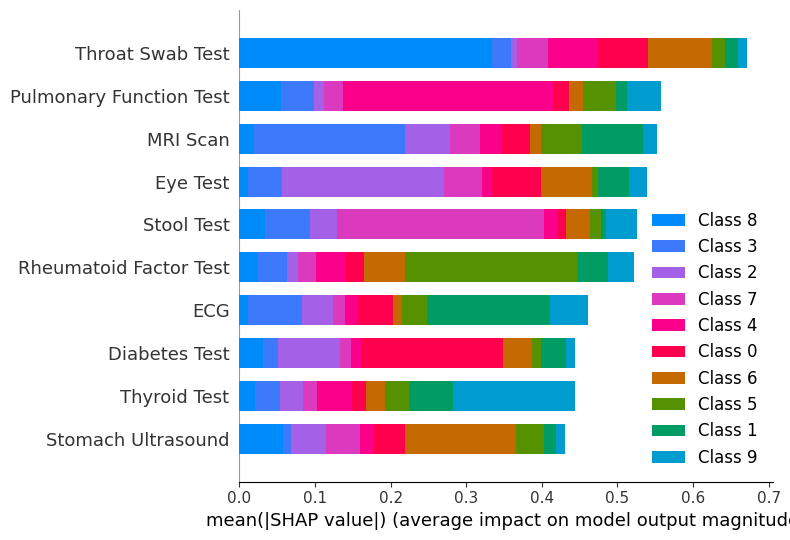

Enter Patient ID: 1001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Suggested tests for Patient ID 1001:
  - Eye Test
  - Rheumatoid Factor Test
  - Stomach Ultrasound
  - Stool Test
  - Throat Swab Test


In [46]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
import shap

# Load dataset
df = pd.read_csv("suggested_tests.csv")

# Store Patient IDs separately
patient_ids = df["Patient ID"]

# Drop Patient ID (not a predictive feature for training)
df.drop(columns=["Patient ID"], inplace=True)

# Splitting features and targets
X = df.copy()  # Features

# Targets are all test columns (multi-label classification)
y = (df > 0).astype(int)  # Convert to binary classification (0 or 1)

# Train-test split
X_train, X_test, y_train, y_test, patient_train, patient_test = train_test_split(
    X, y, patient_ids, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Optimized Multi-Label Classification Model ###
def build_multilabel_classification_model():
    model = keras.Sequential([
        keras.layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(y.shape[1], activation="sigmoid")  # Multi-label output
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Build and train the model with fewer epochs for faster execution
model = build_multilabel_classification_model()
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Performance - Loss: {loss}, Accuracy: {accuracy}")

# Fairness Evaluation using Balanced Accuracy
def evaluate_fairness():
    predictions = (model.predict(X_test) > 0.5).astype(int)  # Convert predictions to binary
    fairness_scores = []
    
    for i, test in enumerate(df.columns):
        fairness_score = balanced_accuracy_score(y_test.iloc[:, i], predictions[:, i])
        fairness_scores.append((test, fairness_score))
    
    fairness_scores.sort(key=lambda x: x[1])  # Sort by fairness score
    print("\nFairness Evaluation (Balanced Accuracy Score):")
    for test, score in fairness_scores:
        print(f"  {test}: {score:.2f}")

evaluate_fairness()

# Explainable AI (XAI) using SHAP values
def explain_model():
    explainer = shap.Explainer(model, X_train)
    shap_values = explainer(X_test)
    
    print("\nFeature Importance for Predictions:")
    shap.summary_plot(shap_values, X_test, feature_names=df.columns)

explain_model()

# Function to predict tests for a specific Patient ID
def get_tests_for_patient(patient_id):
    if patient_id in patient_test.values:
        idx = np.where(patient_test.values == patient_id)[0][0]
        patient_data = X_test[idx].reshape(1, -1)
        predicted_tests = model.predict(patient_data)[0]  # Get predictions
        
        # Convert predictions to binary (threshold 0.5)
        recommended_tests = (predicted_tests > 0.5).astype(int)
        test_names = df.columns[recommended_tests == 1].tolist()
        
        print(f"Suggested tests for Patient ID {patient_id}:")
        for test in test_names:
            print(f"  - {test}")
    else:
        print(f"❌ Patient ID {patient_id} not found in the dataset.")

# Take Patient ID as input and predict
patient_id = int(input("Enter Patient ID: "))
get_tests_for_patient(patient_id)
